# 도표 9-12. 전반적인 통계분석 파이썬 코드

In [7]:
import pandas as pd

# 파일을 불러와서 데이터프레임에 로드
file_path = '/content/sample_data/GI.xlsx'
data = pd.read_excel(file_path)

# 데이터프레임의 첫 5개 행과 컬럼 정보를 출력
data.head(), data.info()

# 'GI' 컬럼에 대한 기술통계 계산
gi_descriptive_stats = data['GI'].describe()
gi_descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DAY     92 non-null     object
 1   GI      92 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


count       92.000000
mean     50076.032609
std       5160.248340
min      37235.000000
25%      46503.500000
50%      50243.500000
75%      53685.000000
max      61348.000000
Name: GI, dtype: float64

In [5]:
# 'GI' 컬럼에 대한 기술통계 계산
gi_descriptive_stats = data['GI'].describe()
gi_descriptive_stats

count       92.000000
mean     50076.032609
std       5160.248340
min      37235.000000
25%      46503.500000
50%      50243.500000
75%      53685.000000
max      61348.000000
Name: GI, dtype: float64

# 도표 9-13. 상관계수와 공분산을 계산하는 파이썬 코드

In [8]:
# 날짜를 연속된 일자 수로 변환한다.
data['DayNumber'] = (pd.to_datetime(data['DAY']) - pd.to_datetime(data['DAY']).min()).dt.days

# 'GI'와 'DayNumber' 간의 상관계수와 공분산 계산한다.
correlation = data[['GI', 'DayNumber']].corr()
covariance = data[['GI', 'DayNumber']].cov()

correlation, covariance

(                 GI  DayNumber
 GI         1.000000  -0.181567
 DayNumber -0.181567   1.000000,
                      GI     DayNumber
 GI         2.662816e+07 -25017.972527
 DayNumber -2.501797e+04    713.000000)

# 표 9-14. 상관계수와 공분산을 산점도로 시각화

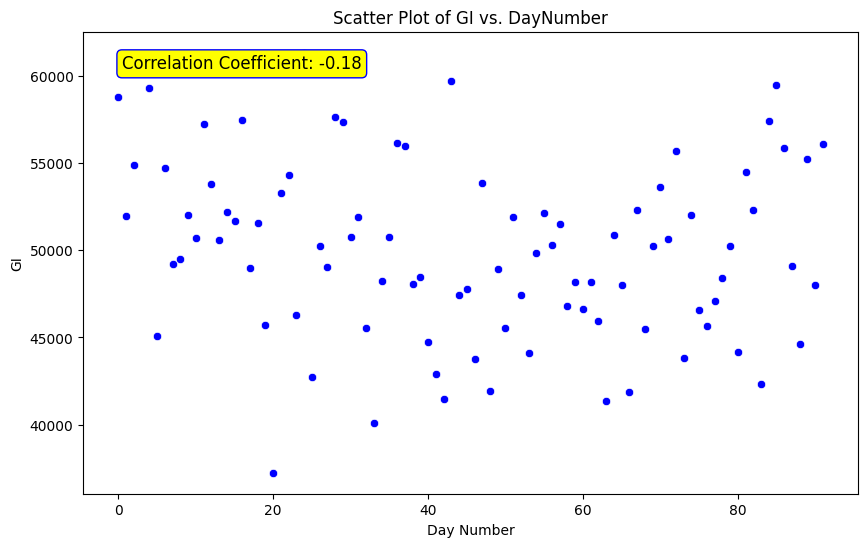

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DayNumber', y='GI', data=data, color="blue", marker='o')
plt.title('Scatter Plot of GI vs. DayNumber')
plt.xlabel('Day Number')
plt.ylabel('GI')

# 상관계수 표시
corr_coefficient = data['GI'].corr(data['DayNumber'])
plt.annotate(f'Correlation Coefficient: {corr_coefficient:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='yellow'))

# 그래프 표시
plt.show()


# 도표 9-15. 왜도와 첨도를 계산하는 파이썬 코드

In [9]:
# 'GI' 컬럼의 왜도와 첨도 계산한다.
skewness = data['GI'].skew()
kurtosis = data['GI'].kurt()

skewness, kurtosis


(0.07384972862173216, -0.40241678546085735)

# 도표 9-16. 왜도와 첨도를 시각화한 히스토그램

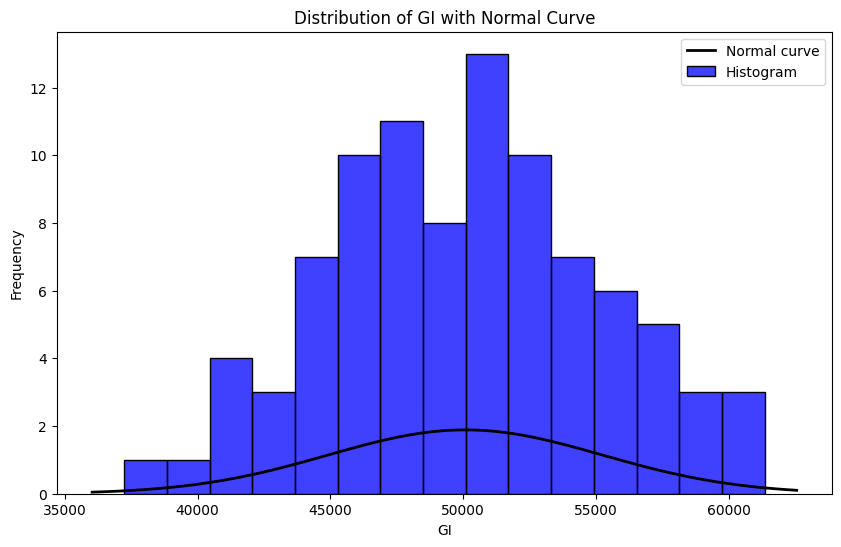

In [13]:
# 히스토그램 및 정규분포 곡선 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data['GI'], kde=False, color="blue", bins=15, label='Histogram')
plt.title('Distribution of GI with Normal Curve')
plt.xlabel('GI')
plt.ylabel('Frequency')

# 정규분포 곡선 추가
mean_gi = data['GI'].mean()
std_gi = data['GI'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_gi, std_gi)
plt.plot(x, p * data['GI'].count() * (xmax - xmin) / len(x), 'k', linewidth=2, label='Normal curve')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()
